# Machine Learning Capstone Project
##### Manish Kumar, 15th October, 2019

### TMDB box-office prediction

## 1. Data Exploration

### 1.1 Importing Data

In [1082]:
#import necessary libraries
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import sklearn
from sklearn.metrics import r2_score
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import SGDRegressor,LinearRegression,Lasso,SGDClassifier
from sklearn.preprocessing import StandardScaler
#Supress Deprecation warnings
import warnings
warnings.simplefilter("ignore")
#Fomatting floating point values
pd.set_option('display.float_format', lambda x: '%.3f' % x)
sb.set(style="darkgrid")
import calendar
from IPython.display import Markdown,display
from ast import literal_eval

In [1083]:
# Print Versions of various Packages
print("Python version: {}".format(sys.version[:5]))
print("sklearn version: {}".format(sklearn.__version__))
print("Pandas version: {}".format(pd.__version__))
print("Numpy version: {}".format(np.__version__))
print("Seaborn version: {}".format(sb.__version__))

Python version: 2.7.1
sklearn version: 0.18.2
Pandas version: 0.20.3
Numpy version: 1.13.3
Seaborn version: 0.9.0


In [1084]:
# Importing training and testing data
tmdb_train=pd.read_csv("train.csv")
tmdb_test=pd.read_csv("test.csv")

### 1.2 Some salient points about Datasets

In [1085]:
# Inspecting training sample record
tmdb_train.head(1)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575,...,2/20/15,93.000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651


In [1086]:
# Inspecting test sample record
tmdb_test.head(1)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.852,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.000,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."


In [1087]:
# Checking size of the datasets
print("Training dataset has {} rows and {} columns.".format(*tmdb_train.shape))
print("Testing dataset has {} rows and {} columns.".format(*tmdb_test.shape))

Training dataset has 3000 rows and 23 columns.
Testing dataset has 4398 rows and 22 columns.


In [1088]:
# Checking datatypes
tmdb_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

##### 1.2.1 Feature Characteristics:
>  
  * __budget__ : *Continuous Numerical data.*
  * __genres__ : *Categorical data (in form of dictionary).*
  * __imdb_id__ : *Continuous Numerical data.*
  * __original_language__ : *Categorical data ('en', 'hi', 'ko', 'sr', 'fr', 'it', 'nl', 'zh', 'es', 'cs', 'ta',
       'cn', 'ru', 'tr', 'ja', 'fa', 'sv', 'de', 'te', 'pt', 'mr', 'da','fi', 'el', 'ur', 'he', 'no', 'ar', 'nb', 
       'ro', 'vi', 'pl', 'hu','ml', 'bn', 'id').* 
  * __original_title__ : *Textual data.*
  * __popularity__ : *Continuous Numerical data.*
  * __production_companies__ : *Categorical data.*
  * __production_countries__ : *Categorical data.*
  * __release_date__: *Date type.*
  * __runtime__ : *Continuous Numerical data.*
  * __spoken_languages__: *Categorical data.*
  * __status__ : *Categorical data ('Released', 'Rumored').*
  * __title__ : *Textual data.*
  * __cast__ : *Textual data.*
  * __crew__ : *Textual data.*
  * __revenue__ : *Continuous Numerical data.*

In [1089]:
tmdb_train=tmdb_train.drop(['id','belongs_to_collection','imdb_id','poster_path','tagline','title','homepage',\
                            'overview','original_title',],axis=1)

In [1090]:
tmdb_train.head(5)

,budget,genres,original_language,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,Keywords,cast,crew,revenue
0,14000000,"[{'id': 35, 'name': 'Comedy'}]",en,6.575,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,8.249,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3300000,"[{'id': 18, 'name': 'Drama'}]",en,64.300,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,3.175,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.000,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,1.148,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.000,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970



### 1.3 Data types and Anomalies Detection: Missing values, Duplicates, Null values, Outliers etc.

In [1091]:
# Checking basic statistics
tmdb_train.describe()

,budget,popularity,runtime,revenue
count,3000.000,3000.000,2998.000,3000.000
mean,22531334.110,8.463,107.857,66725851.889
std,37026086.412,12.104,22.086,137532326.336
min,0.000,0.000,0.000,1.000
25%,0.000,4.018,94.000,2379808.250
50%,8000000.000,7.375,104.000,16807068.000
75%,29000000.000,10.891,118.000,68919203.500
max,380000000.000,294.337,338.000,1519557910.000


In [1092]:
# Checking which column has missing values, if any
tmdb_train.isnull().sum()

budget                    0
genres                    7
original_language         0
popularity                0
production_companies    156
production_countries     55
release_date              0
runtime                   2
spoken_languages         20
status                    0
Keywords                276
cast                     13
crew                     16
revenue                   0
dtype: int64

In [1093]:
# Number of records where runtime is zero
tmdb_train[tmdb_train.runtime==0].count()

budget                  12
genres                  12
original_language       12
popularity              12
production_companies    10
production_countries    12
release_date            12
runtime                 12
spoken_languages        11
status                  12
Keywords                 5
cast                    12
crew                    12
revenue                 12
dtype: int64

In [1094]:
# Number of records where budget is zero
tmdb_train[tmdb_train.budget==0].count()

budget                  812
genres                  810
original_language       812
popularity              812
production_companies    730
production_countries    776
release_date            812
runtime                 811
spoken_languages        799
status                  812
Keywords                675
cast                    811
crew                    809
revenue                 812
dtype: int64

In [1095]:
# Number of records where budget is zero
tmdb_train[tmdb_train.popularity==0].count()

budget                  0
genres                  0
original_language       0
popularity              0
production_companies    0
production_countries    0
release_date            0
runtime                 0
spoken_languages        0
status                  0
Keywords                0
cast                    0
crew                    0
revenue                 0
dtype: int64

##### 1.3.1 Data Cleaning

In [1097]:
tmdb_train.drop(tmdb_train[pd.isnull(tmdb_train['runtime'])==True].index,inplace=True)

In [1098]:
#tmdb_train.drop(tmdb_train[tmdb_train.budget==0].index,inplace=True)

In [1099]:
tmdb_train.drop(tmdb_train[pd.isnull(tmdb_train['genres'])==True].index,inplace=True)

In [1100]:
# Convert columns into int type
tmdb_train['budget']=tmdb_train['budget'].astype(np.int64)
tmdb_train['popularity']=tmdb_train['popularity'].astype(np.int64)
tmdb_train['runtime']=tmdb_train['runtime'].astype(np.int64)
tmdb_train['revenue']=tmdb_train['revenue'].astype(np.int64)

In [1101]:
# Checking which column has missing values, if any
tmdb_train.isnull().sum()

budget                    0
genres                    0
original_language         0
popularity                0
production_companies    148
production_countries     51
release_date              0
runtime                   0
spoken_languages         16
status                    0
Keywords                270
cast                     13
crew                     14
revenue                   0
dtype: int64

In [1102]:
tmdb_train.shape

(2991, 14)

##### 1.3.2 Feature Engineering

In [1103]:
def genres(lst):
    #print(lst)
    #print(type(lst))
    gen=[]
    for i in range(len(lst)):
        gen.append(lst[i]['name'].rstrip())
    return (','.join(gen))

In [1104]:
tmdb_train['genres']=tmdb_train.genres.apply(lambda x: genres(literal_eval(x)))

In [1105]:
tmdb_train.head(5)

,budget,genres,original_language,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,Keywords,cast,crew,revenue
0,14000000,Comedy,en,6,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,40000000,"Comedy,Drama,Family,Romance",en,8,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3300000,Drama,en,64,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,1200000,"Thriller,Drama",hi,3,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,0,"Action,Thriller",ko,1,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [1106]:
# Converting 'release_date' to datetime type
tmdb_train['release_date']=pd.to_datetime(tmdb_train['release_date'])

In [1107]:
# Extracting month from 'release_date'
tmdb_train['release_month']=tmdb_train['release_date'].dt.month

In [1108]:
# Extracting day of week from 'release_date'
tmdb_train['day_of_week']=tmdb_train['release_date'].dt.dayofweek

In [1109]:
# Converting month into month_name
tmdb_train['release_month']=tmdb_train['release_month'].apply(lambda m:calendar.month_abbr[m])

In [1110]:
# Converting day of week into weekday name
tmdb_train['day_of_week']=tmdb_train['day_of_week'].apply(lambda d:calendar.day_name[d])

### 1.4 Exploratory Data Analysis Using Data Visualization

##### 1.4.1 Univariate Analysis

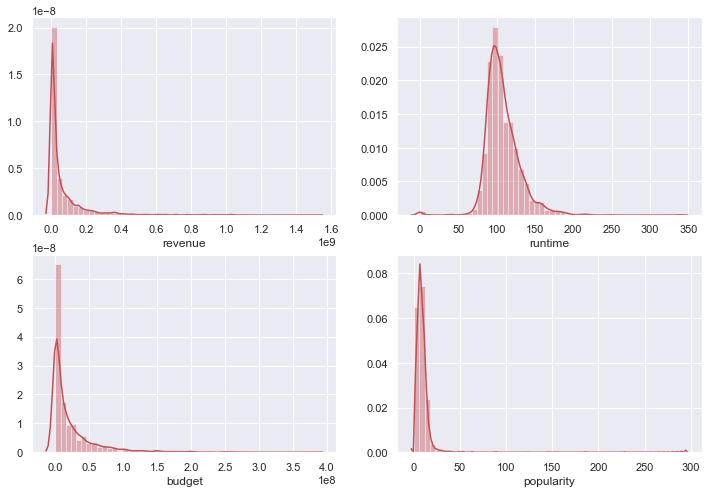

In [1111]:
# Drawing histogram of 'revenue', 'runtime', 'budget' and 'popularity'
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sb.distplot(tmdb_train.revenue,color='r');
plt.subplot(2, 2, 2)
sb.distplot(tmdb_train.runtime,color='r');
plt.subplot(2, 2, 3)
sb.distplot(tmdb_train.budget,color='r');
plt.subplot(2, 2, 4)
sb.distplot(tmdb_train.popularity,color='r');

##### 1.4.2 Bivariate Analysis

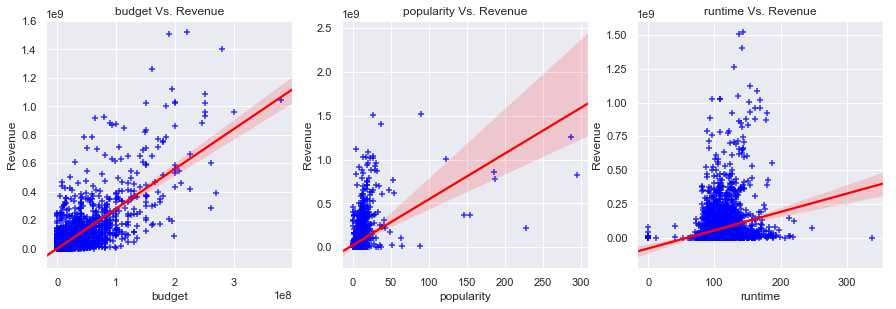

In [1112]:
# Drawing scatterplots to see the correlation between the features and label variable
columns=['budget','popularity','runtime']
m=len(columns)
plt.figure(figsize=(15,10))
for i,col in enumerate(columns):
    plt.subplot((m//3)+1,3,i+1)
    sb.regplot(tmdb_train[col], tmdb_train.revenue, marker='+',scatter_kws={"color": "blue"}, line_kws={"color": "red"})
    plt.title('%s Vs. Revenue' % col)
    plt.xlabel(col)
    plt.ylabel('Revenue')      

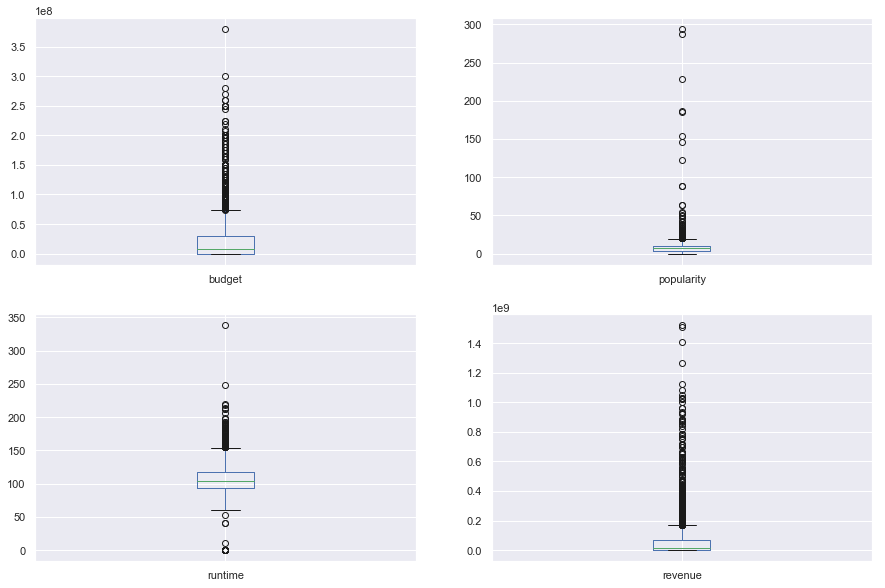

In [1113]:
columns=['budget','popularity','runtime','revenue']
m=len(columns)
plt.figure(figsize=(15,10))
for i,col in enumerate(columns):
    plt.subplot((m//3)+1,2,i+1)
    tmdb_train[col].plot(kind='box')

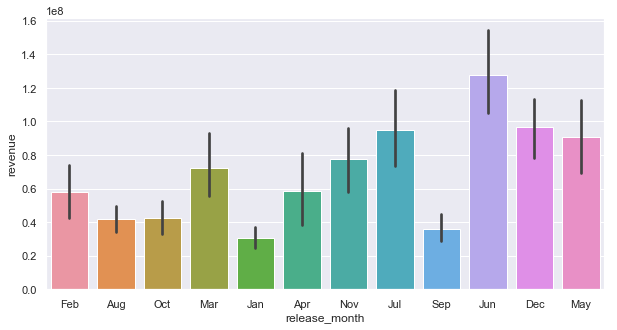

In [1114]:
plt.figure(figsize=(10,5))
sb.barplot(data=tmdb_train,y='revenue',x='release_month');

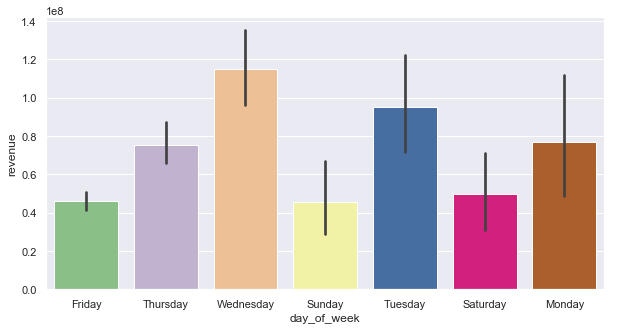

In [1115]:
plt.figure(figsize=(10,5))
sb.barplot(x='day_of_week',y='revenue',data=tmdb_train,palette='Accent');

##### 1.4.2 Multivariate Analysis

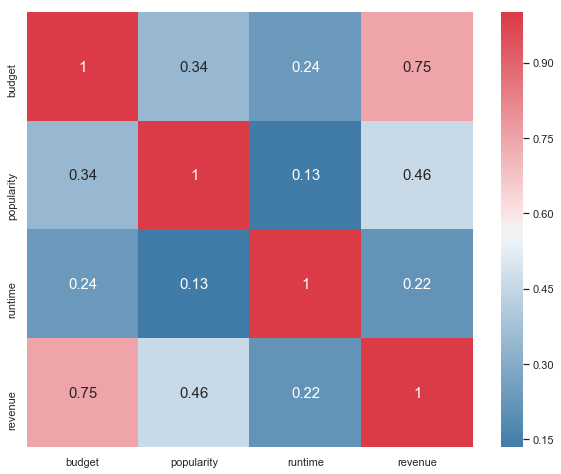

In [1116]:
plt.figure(figsize=(10,8))
cmap = sb.diverging_palette(240, 10, as_cmap=True);
sb.heatmap(tmdb_train.corr(),annot=True,annot_kws={'size':15},cmap=cmap);

##### Remove Redundant Variables: 
>id, belongs_to_collection, homepage, imdb_id, original_language, original_title, overview, poster_path, production_companies, production_countries, 

### Features:

> popularity, runtime, budget, release_date

In [1117]:
# Filtering important features only
tmdb_train_df=tmdb_train[['budget','popularity','runtime','release_month','day_of_week','revenue','genres']]

## 2. Data Preprocessing

In [1118]:
# After data cleaning the size of the dataset
tmdb_train_df.shape

(2991, 7)

In [1119]:
tmdb_train_df.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2991 entries, 0 to 2999
Data columns (total 7 columns):
budget           2991 non-null int64
popularity       2991 non-null int64
runtime          2991 non-null int64
release_month    2991 non-null object
day_of_week      2991 non-null object
revenue          2991 non-null int64
genres           2991 non-null object
dtypes: int64(4), object(3)
memory usage: 266.9+ KB


In [1120]:
tmdb_train_df.head()

,budget,popularity,runtime,release_month,day_of_week,revenue,genres
0,14000000,6,93,Feb,Friday,12314651,Comedy
1,40000000,8,113,Aug,Friday,95149435,"Comedy,Drama,Family,Romance"
2,3300000,64,105,Oct,Friday,13092000,Drama
3,1200000,3,122,Mar,Friday,16000000,"Thriller,Drama"
4,0,1,118,Feb,Thursday,3923970,"Action,Thriller"


In [1121]:
tmdb_train_df=pd.concat([tmdb_train_df,tmdb_train_df.genres.str.get_dummies(sep=',')],axis=1)

In [1122]:
# Separating features and response variables
revenue=tmdb_train_df['revenue']
features=tmdb_train_df.drop(['revenue','genres'],axis=1)

In [1123]:
features.head()

,budget,popularity,runtime,release_month,day_of_week,Action,Adventure,Animation,Comedy,Crime,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,14000000,6,93,Feb,Friday,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,40000000,8,113,Aug,Friday,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,3300000,64,105,Oct,Friday,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200000,3,122,Mar,Friday,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,118,Feb,Thursday,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


##### 2.1.1 Feature Engineering

In [1124]:
# Creating one-hot encoding for categorical variable 'release_month' and 'day_of_week'
features_1=pd.get_dummies(features)

In [1125]:
print("Number of Features: {}".format(len(features_1.columns)))

Number of Features: 42


In [1126]:
features_1.head()

,budget,popularity,runtime,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,...,release_month_Nov,release_month_Oct,release_month_Sep,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,14000000,6,93,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,40000000,8,113,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,3300000,64,105,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
3,1200000,3,122,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,1,118,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [1127]:
X_train, X_test, y_train, y_test = train_test_split(features_1,revenue,test_size=0.2,random_state=42)

In [1128]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

## 3. Initial Model Implementation

##### Benchmark Model

In [1129]:
reg_b=LinearRegression()

In [1130]:
reg_b.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [1131]:
y_pred_b=reg_b.predict(X_test)

##### Proposed Model

In [1132]:
reg_p=SGDRegressor() #eta0=0.000001,loss="squared_loss", penalty="none",n_iter=1000
reg_p.fit(X_train,y_train)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

In [1133]:
y_pred_p=reg_p.predict(X_test)

In [1134]:
print("Coefficients:{}".format(len(reg_p.coef_)))

Coefficients:42


## 4. Model Evaluation

In [1135]:
def model_eval(y_true,y_pred):
    eval_score=r2_score(y_true,y_pred)
    return eval_score

In [1136]:
def scatter_plot(y_test,y_pred,model):
    sb.regplot(y_test, y_pred,marker='o',scatter_kws={"color": "blue"}, line_kws={"color": "green"});
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'go--', lw=2,color='red');
    plt.plot([y_pred.min(), y_pred.max()], [y_pred.min(), y_pred.max()], 'go--', lw=2,color='m');
    plt.xlabel('True Value')
    plt.ylabel('Predicted value')
    plt.title(model+", R2_Score: "+str(+model_eval(y_test,y_pred)),fontsize=14);

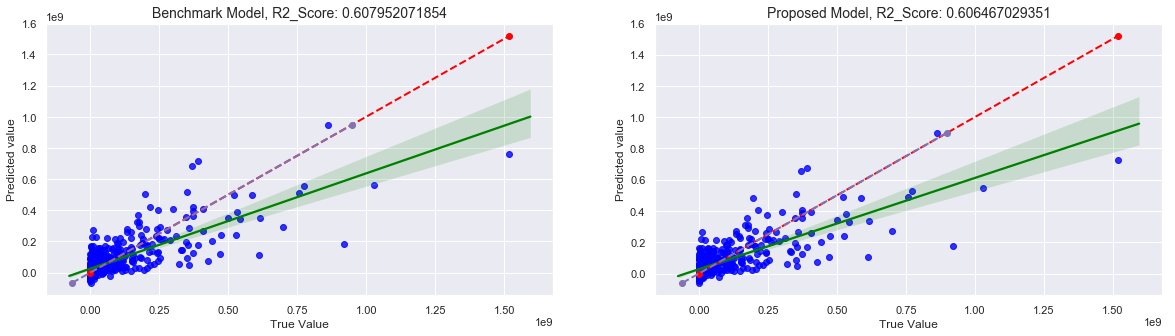

In [1137]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
scatter_plot(y_test,y_pred_b,"Benchmark Model");
plt.subplot(1, 2, 2)
scatter_plot(y_test,y_pred_p,"Proposed Model");

## 5. Model Tuning

In [1138]:
reg=SGDRegressor(eta0=0.0001,loss="squared_loss", penalty="none",n_iter=1000,power_t = 0.05)
reg.fit(X_train,y_train)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0001,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=1000, penalty='none', power_t=0.05,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

In [1139]:
y_pred_op=reg.predict(X_test)

## 6. Final Model Evaluation

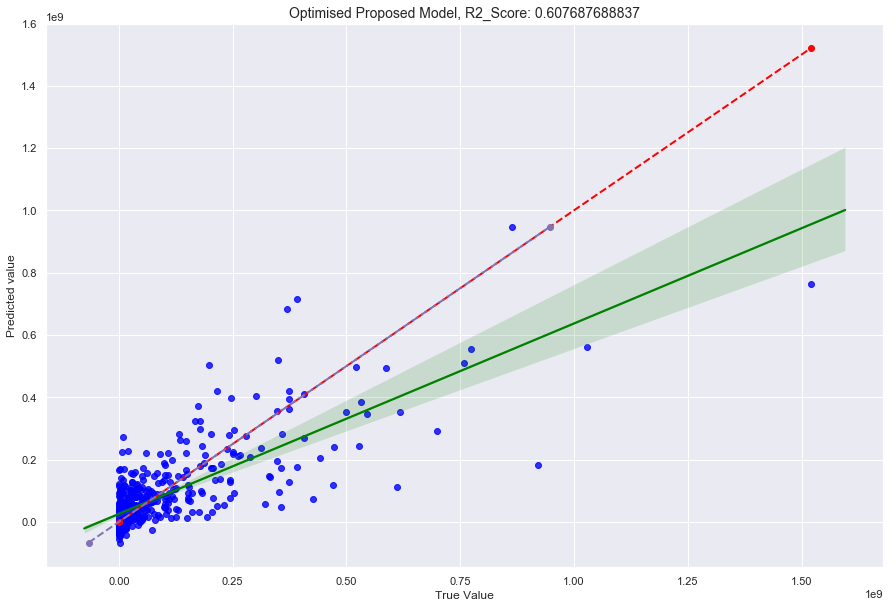

In [1140]:
plt.figure(figsize=(15,10))
scatter_plot(y_test,y_pred_op,"Optimised Proposed Model");

## 7. Conclusions

In [1141]:
print("Benchmark Model Score: {0:.5f}".format(model_eval(y_test,y_pred_b)))
print("Proposed Model Score: {0:.5f}".format(model_eval(y_test,y_pred_p)))
print("__Optimized Proposed Model Score: {0:.5f}__".format(model_eval(y_test,y_pred_op)))

Benchmark Model Score: 0.60795
Proposed Model Score: 0.60647
__Optimized Proposed Model Score: 0.60769__


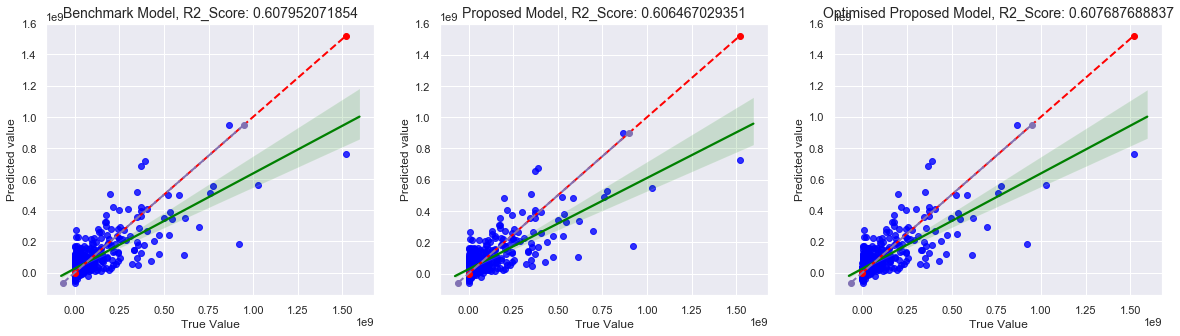

In [1142]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
scatter_plot(y_test,y_pred_b,"Benchmark Model");
plt.subplot(1, 3, 2)
scatter_plot(y_test,y_pred_p,"Proposed Model");
plt.subplot(1, 3, 3)
scatter_plot(y_test,y_pred_op,"Optimised Proposed Model");

### References:


[1] Scikit-learn Documentation, V.18, (https://scikit-learn.org/0.18/documentation.html) 